In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split



In [ ]:
dicionario = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/dicionario_nascidos_vivos.csv')
df = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/amostra_nascidos_vivos.csv')


df_covid = pd.read_csv('https://raw.githubusercontent.com/beromes/projeto-icd/main/datasets/covid19.csv')

In [ ]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['font.family'] = 'serif'
plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 80
plt.style.use('tableau-colorblind10')
plt.ion()

In [ ]:
df.head()

,ano,sigla_uf,local_nascimento,data_nascimento,hora_nascimento,sexo,peso,raca_cor,id_anomalia,codigo_anomalia,...,quantidade_filhos_mortos,idade_mae,escolaridade_mae,estado_civil_mae,ocupacao_mae,raca_cor_mae,gestacoes_ant,quantidade_parto_normal,quantidade_parto_cesareo,idade_pai
0,2015,MS,1,2015-11-09,16:41:00,1,3350.0,4.0,2.0,NaN,...,0.0,16.0,4.0,5.0,999991.0,4.0,1.0,0.0,1.0,18.0
1,2015,PA,1,2015-03-28,13:45:00,2,3000.0,4.0,2.0,NaN,...,0.0,31.0,3.0,5.0,999992.0,4.0,3.0,2.0,1.0,23.0
2,2019,SP,1,2019-01-17,01:20:00,1,3540.0,1.0,2.0,NaN,...,1.0,33.0,4.0,2.0,141410.0,1.0,2.0,0.0,1.0,27.0
3,2021,CE,1,2021-05-17,1437.0,2,3780.0,4.0,2.0,NaN,...,0.0,28.0,4.0,1.0,999992.0,4.0,1.0,0.0,1.0,NaN
4,2017,ES,1,2017-05-10,17:42:00,2,2585.0,4.0,2.0,NaN,...,0.0,36.0,4.0,1.0,517410.0,4.0,3.0,3.0,0.0,NaN


In [ ]:
df_covid.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2022-03-26,PI,Acauã,city,228,2,True,7102.0,2200053.0,3210.36328,0.0088
1,2022-03-26,PI,Agricolândia,city,829,10,True,5131.0,2200103.0,16156.69460,0.0121
2,2022-03-26,PI,Água Branca,city,1702,77,True,17470.0,2200202.0,9742.41557,0.0452
3,2022-03-26,PI,Alagoinha do Piauí,city,402,13,True,7665.0,2200251.0,5244.61840,0.0323
4,2022-03-26,PI,Alegrete do Piauí,city,553,9,True,4918.0,2200277.0,11244.40830,0.0163


In [ ]:
df['ano'] = df['ano'].astype(int)
df['sigla_uf'] = df['sigla_uf'].astype(str)
df_covid['date'] = pd.to_datetime(df_covid['date'])


In [ ]:
nascidos_agrupados = df.groupby(['ano', 'sigla_uf']).size().reset_index(name='n_nascidos')

In [ ]:
covid_agrupado = df_covid[df_covid['place_type'] == 'city'].groupby(['date', 'state'], as_index=False)['confirmed'].sum()
covid_agrupado.rename(columns={'confirmed': 'n_casos'}, inplace=True)

In [ ]:
dados_combinados = pd.concat([nascidos_agrupados, covid_agrupado], axis=1)
dados_combinados = dados_combinados.loc[:, ~dados_combinados.columns.duplicated()]

dados_combinados.dropna(inplace=True)


In [ ]:
X = dados_combinados['n_nascidos'].values.reshape(-1, 1)
y = dados_combinados['n_casos'].values.reshape(-1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

y_pred = lin_regr.predict(X_test)

In [ ]:
print(f'Coefficient: {lin_regr.coef_[0][0]:.2f}')
print(f'Intercept: {lin_regr.intercept_[0]:.2f}')
print(f'Mean squared error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R2: {r2_score(y_test, y_pred):.2f}')

Coefficient: 428.34
Intercept: 476775.39
Mean squared error: 2534475911293.10
R2: -0.21


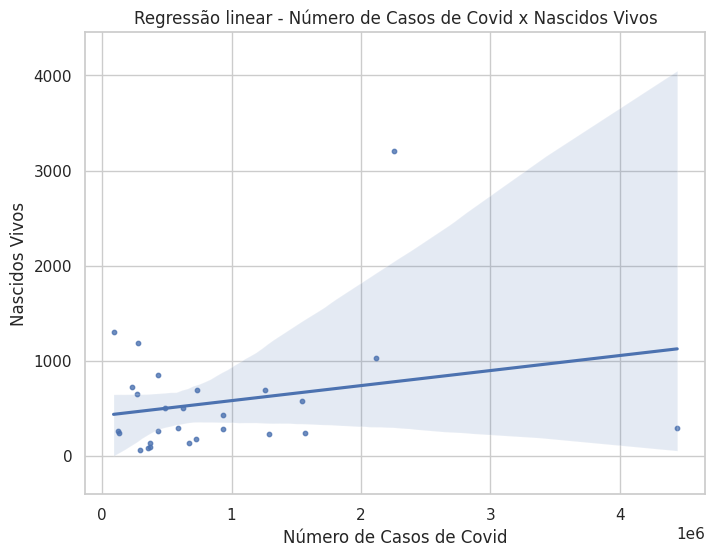

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x='n_casos', y='n_nascidos', data=dados_combinados, scatter_kws={'s': 10})

plt.title('Regressão linear - Número de Casos de Covid x Nascidos Vivos')
plt.xlabel('Número de Casos de Covid')
plt.ylabel('Nascidos Vivos')
plt.show()

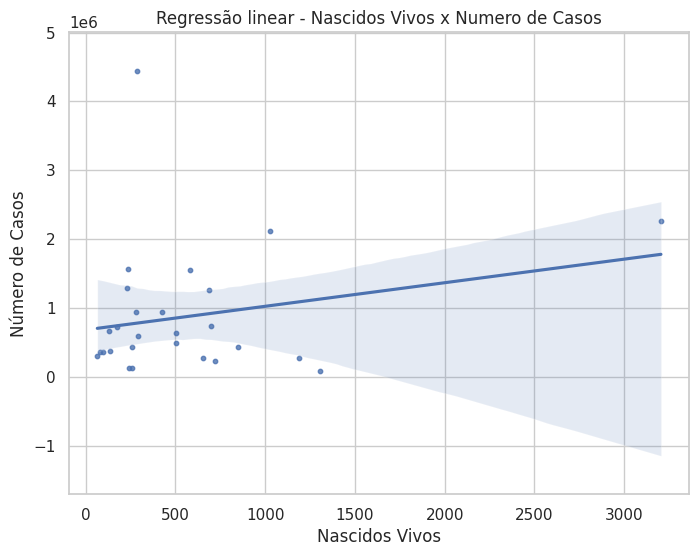

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.regplot(x='n_nascidos', y='n_casos', data=dados_combinados, scatter_kws={'s': 10})

plt.title('Regressão linear - Nascidos Vivos x Numero de Casos')
plt.xlabel('Nascidos Vivos')
plt.ylabel('Número de Casos')
plt.show()